# OVERVIEW

There are 3 Main Process that will be apllied in this case :
    1. Data Preparation and Preprocessing
    2. Modelling Comparison
    3. Hyperparameter Tuning
    4. Metrics Evaluation for the fix Model


# Data Preparation and Preprocessing

In This Section, We have 11 data sources. There are :
1. 10 driver datasets 
2. Label datasets

Steps of our data processing are :
1. Import all datasets
2. Concate 10 driver datasets become single main dataset as dataframe
3. Get Information about Dataset (Like some missing value, size of table, metadata, etc)
4. Make Some Feature Engineering that consist Adding new features to dataset
4. Aggregate the dataset by 'bookingID' variabel with Mean
5. Merge 'label' dataset to the main dataset
3. Cleaning Dataset
    1. Avoid redundant
    2. Missing Value Checking


## Import Library

In [25]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.cross_validation import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
warnings.filterwarnings("ignore")

# Data Preparation

### Load the datasets

In [9]:
data1 = pd.read_csv('part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
data2 = pd.read_csv('part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
data3 = pd.read_csv('part-00002-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
data4 = pd.read_csv('part-00003-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
data5 = pd.read_csv('part-00004-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
data6 = pd.read_csv('part-00005-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
data7 = pd.read_csv('part-00006-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
data8 = pd.read_csv('part-00007-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
data9 = pd.read_csv('part-00008-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
data10 = pd.read_csv('part-00009-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
label = pd.read_csv('part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv')

### Concat all datasets become one main datasets as dataframe

In [10]:
data=pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9,data10],0)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16135561 entries, 0 to 1613561
Data columns (total 11 columns):
bookingID         int64
Accuracy          float64
Bearing           float64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
second            float64
Speed             float64
dtypes: float64(10), int64(1)
memory usage: 1.4 GB


In [4]:
data.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1202590843006,3.000,353.0,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,274877907034,9.293,17.0,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,884763263056,3.000,189.0,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,1073741824054,3.900,126.0,3.871543,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,1056561954943,3.900,50.0,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409


## Feature Engineering

### Feature Distance

In [5]:
###Distance
data['distance']=data['Speed']*data['second']

### Feature Speed

To make this feature, I multiply 'acceleration' with 'second' to produce feature 'second'
I use Euclid distance to determine the interaction from the Feature Speed. 
I use this method to add new faeture because this feature contain direction/vector like (x,y,z)

In [6]:
###Speed
data['speed_x']=data['acceleration_x']*data['second']
data['speed_y']=data['acceleration_y']*data['second']
data['speed_z']=data['acceleration_z']*data['second']
data['speed_xy']=np.sqrt(data['speed_x']**2+data['speed_y']**2)
data['speed_xz']=np.sqrt(data['speed_x']**2+data['speed_z']**2)
data['speed_yz']=np.sqrt(data['speed_z']**2+data['speed_y']**2)
data['speed_xyz']=np.sqrt(data['speed_x']**2+data['speed_y']**2+data['speed_z']**2)

### Feature Radian

To make this feature, I multiply 'gyro' with 'second' to produce feature 'second'
I use Euclid distance to determine the interaction from the Feature Radian. 
I use this method to add new faeture because this feature contain direction/vector like (x,y,z)

In [7]:
###radian
data['rad_x']=data['gyro_x']*data['second']
data['rad_y']=data['gyro_y']*data['second']
data['rad_z']=data['gyro_z']*data['second']
data['rad_xy']=np.sqrt(data['rad_x']**2+data['rad_y']**2)
data['rad_xz']=np.sqrt(data['rad_x']**2+data['rad_z']**2)
data['rad_yz']=np.sqrt(data['rad_z']**2+data['rad_y']**2)
data['rad_xyz']=np.sqrt(data['rad_x']**2+data['rad_y']**2+data['rad_z']**2)

### Feature Acceleration

I make the interaction variable with all the combination of the feature 'Acceleration' based on the vector theorem. 
I use Euclid Method to combine the feature

In [8]:
###Acceleration
data['acc_xy']=np.sqrt(data['acceleration_x']**2+data['acceleration_y']**2)
data['acc_xz']=np.sqrt(data['acceleration_x']**2+data['acceleration_z']**2)
data['acc_yz']=np.sqrt(data['acceleration_z']**2+data['acceleration_y']**2)
data['acc_xyz']=np.sqrt(data['acceleration_x']**2+data['acceleration_y']**2+data['acceleration_z']**2)

### Feature Gyro

I make the interaction variable with all the combination of the feature 'Gyro' based on the vector theorem. 
I use Euclid Method to combine the feature

In [9]:
###Gyro
data['gyro_xy']=np.sqrt(data['gyro_x']**2+data['gyro_y']**2)
data['gyro_xz']=np.sqrt(data['gyro_x']**2+data['gyro_z']**2)
data['gyro_yz']=np.sqrt(data['gyro_z']**2+data['gyro_y']**2)
data['gyro_xyz']=np.sqrt(data['gyro_x']**2+data['gyro_y']**2+data['gyro_z']**2)

In [10]:
###Interaction
data['acc_gyro_x']=data['acceleration_x']*data['gyro_x']
data['acc_gyro_y']=data['acceleration_y']*data['gyro_y']
data['acc_gyro_z']=data['acceleration_z']*data['gyro_z']
data['acc_gyro_xy']=np.sqrt(data['acc_gyro_x']**2+data['acc_gyro_y']**2)
data['acc_gyro_xz']=np.sqrt(data['acc_gyro_x']**2+data['acc_gyro_z']**2)
data['acc_gyro_yz']=np.sqrt(data['acc_gyro_z']**2+data['acc_gyro_y']**2)
data['acc_gyro_xyz']=np.sqrt(data['acc_gyro_x']**2+data['acc_gyro_y']**2+data['acc_gyro_z']**2)

### Feature Count

I aggregate all the 'bookingID' Feature by count so we know how many call that got by the driver

In [11]:
a=data['bookingID'].value_counts()
ID=pd.DataFrame(a)
ID['id']=ID.index
ID['count']=ID['bookingID']
#ID.head()
Count_df=pd.DataFrame()
Count_df['bookingID']=ID['id']
Count_df['count']=ID['count']

### Data Aggregation by Mean each BookingID and Merge the aggregation data with label

In [8]:
variabel=['bookingID', 'Accuracy', 'Bearing', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 'second', 'Speed',
       'distance', 'speed_x', 'speed_y', 'speed_z', 'speed_xy', 'speed_xz',
       'speed_yz', 'speed_xyz', 'rad_x', 'rad_y', 'rad_z', 'rad_xy', 'rad_xz',
       'rad_yz', 'rad_xyz', 'acc_xy', 'acc_xz', 'acc_yz', 'acc_xyz', 'gyro_xy',
       'gyro_xz', 'gyro_yz', 'gyro_xyz', 'acc_gyro_x', 'acc_gyro_y',
       'acc_gyro_z', 'acc_gyro_xy', 'acc_gyro_xz', 'acc_gyro_yz']
dataAg=data.groupby('bookingID', as_index=False)[variabel].mean()
dataAg.info()
df_main = pd.merge(dataAg,label,how='left',left_on = 'bookingID',right_on = 'bookingID')

print(df_main.info())
df_main.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20018 entries, 0 to 20017
Data columns (total 41 columns):
bookingID         20018 non-null int64
Accuracy          20018 non-null float64
Bearing           20018 non-null float64
Speed             20018 non-null float64
acc_gyro_x        20018 non-null float64
acc_gyro_xy       20018 non-null float64
acc_gyro_xz       20018 non-null float64
acc_gyro_y        20018 non-null float64
acc_gyro_yz       20018 non-null float64
acc_gyro_z        20018 non-null float64
acc_xy            20018 non-null float64
acc_xyz           20018 non-null float64
acc_xz            20018 non-null float64
acc_yz            20018 non-null float64
acceleration_x    20018 non-null float64
acceleration_y    20018 non-null float64
acceleration_z    20018 non-null float64
distance          20018 non-null float64
gyro_x            20018 non-null float64
gyro_xy           20018 non-null float64
gyro_xyz          20018 non-null float64
gyro_xz           20018 non-null

,bookingID,Accuracy,Bearing,Speed,acc_gyro_x,acc_gyro_xy,acc_gyro_xz,acc_gyro_y,acc_gyro_yz,acc_gyro_z,...,rad_z,second,speed_x,speed_xy,speed_xyz,speed_xz,speed_y,speed_yz,speed_z,label
0,0,10.165339,176.526099,8.994822,-0.011891,0.633826,0.105596,0.067631,0.645055,0.001921,...,-4.408486,903.526892,-649.397432,8756.046336,8948.720935,1959.080189,-8685.711305,8879.839458,-1474.337306,0
1,1,3.718763,124.198590,7.881588,0.002711,0.497354,0.056595,-0.070063,0.503368,-0.001414,...,0.115987,581.175088,-296.255476,5555.544029,5724.985279,1390.011395,5530.225067,5700.590845,-1290.127486,1
2,2,3.930626,173.794872,3.157213,-0.000493,0.718235,0.038764,-0.124528,0.716790,-0.003984,...,-0.086165,339.441026,166.995474,3332.772481,3349.991563,382.530340,3322.604563,3339.885726,105.561403,1
3,4,10.000000,151.807013,6.150996,0.010705,0.743528,0.125491,-0.224052,0.767880,0.000394,...,1.521071,547.495430,-186.771902,5177.597451,5381.628682,1454.127062,-5164.378666,5368.923123,-1403.165916,1
4,6,4.586721,197.812785,4.628921,0.002100,0.549155,0.100458,0.007564,0.560269,0.005758,...,2.399600,547.000000,293.796925,5248.063573,5431.004124,1420.980777,5215.909839,5400.103212,1286.210423,0


### Merge the Count Feature to the main dataset by BookingId

In [12]:
df_main = pd.merge(df_main,Count_df,how='left',left_on = 'bookingID',right_on = 'bookingID')
df_main.head()

,bookingID,Accuracy,Bearing,Speed,acc_gyro_x,acc_gyro_xy,acc_gyro_xz,acc_gyro_y,acc_gyro_yz,acc_gyro_z,...,second,speed_x,speed_xy,speed_xyz,speed_xz,speed_y,speed_yz,speed_z,label,count
0,0,10.165339,176.526099,8.994822,-0.011891,0.633826,0.105596,0.067631,0.645055,0.001921,...,903.526892,-649.397432,8756.046336,8948.720935,1959.080189,-8685.711305,8879.839458,-1474.337306,0,1004
1,1,3.718763,124.198590,7.881588,0.002711,0.497354,0.056595,-0.070063,0.503368,-0.001414,...,581.175088,-296.255476,5555.544029,5724.985279,1390.011395,5530.225067,5700.590845,-1290.127486,1,851
2,2,3.930626,173.794872,3.157213,-0.000493,0.718235,0.038764,-0.124528,0.716790,-0.003984,...,339.441026,166.995474,3332.772481,3349.991563,382.530340,3322.604563,3339.885726,105.561403,1,195
3,4,10.000000,151.807013,6.150996,0.010705,0.743528,0.125491,-0.224052,0.767880,0.000394,...,547.495430,-186.771902,5177.597451,5381.628682,1454.127062,-5164.378666,5368.923123,-1403.165916,1,1094
4,6,4.586721,197.812785,4.628921,0.002100,0.549155,0.100458,0.007564,0.560269,0.005758,...,547.000000,293.796925,5248.063573,5431.004124,1420.980777,5215.909839,5400.103212,1286.210423,0,1095


# Model Comparison

### Preparing data for modelling

In [90]:
X = df_main.drop(['label'],1)
df_main = df_main.drop(['bookingID'],axis=1)
df_main = pd.get_dummies(df_main)
y = df_main['label']

### Check the data balance

In [14]:
df_main['label'].value_counts()
df_main['label'].value_counts(normalize = True)

0    0.750175
1    0.249825
Name: label, dtype: float64

The data is Unbalance, so I use sampling to avoid the affect from imbalancing dataset

In [15]:
X = X.values

# MAKE MODELLING FUNCTION

When we build this function we use some method :
1. Training and testing split
2. Stratified 10-Fold Cross Validation each method classification in training data
3. Balancing data when we build a model, but in validation fold is similar like original data
4. Evaluate every model

In [26]:
import pandas as pd
import numpy as np
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss

def geometric_mean_pres_rec(y_true,y_pred):
    score = precision_score(y_true,y_pred)*recall_score(y_true,y_pred)
    return(score)


def model_classification(verbose):
    # simple classification
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neural_network import MLPClassifier
    
    # hard classification
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
    
    if verbose:
        print("Set Simple Model")
    logreg = LogisticRegression(penalty='l2')
    knn = KNeighborsClassifier()
    nb = BernoulliNB()
    dt = DecisionTreeClassifier()
    
    if verbose:print("Set Hard Model\n")
    rf = RandomForestClassifier(random_state = 77)
    gbc = GradientBoostingClassifier(random_state=77 )
    xgb = XGBClassifier(random_state=77)
    
    model = [logreg,knn,nb,dt,rf,gbc,xgb]
    method_name = ['Logistic Regression',
                  'K-Nearest Neighbor',
                  'Naive Bayes',
                  'Decision Tree',
                  'Random Forest',
                  'Gradient Boosting Classifier',
                  'Extreme Gradient Boosting']
    return [model,method_name]
    
def pipe_imbalance(X,y,imb = RandomUnderSampler(),verbose = False):
    
    df_eval = pd.DataFrame(columns = ['Model',
                                    'Accuracy',
                                    'Precision',
                                    'Recall',
                                    'AUC',
                                    'F1_score',
                                    'Log_loss',
                                    'Geometric_Mean',
                                    'Geometric_Mean_Precision_Recall',
                                    'Time'])

    if verbose: print("Split Training and Testing\n")
    X_train, X_test,y_train,y_test = train_test_split(X,
                                                        y,
                                                        test_size = 0.3,
                                                        stratify = y,
                                                        #random_state = 123
                                                     )

    if verbose: print('Import Classification Method\n')
    
    list_model = model_classification(True)
    df_eval['Model']=list_model[1]

    if verbose: print('Building Pipeline\n')
    pipe = Pipeline([('imb',imb),('classifier',LogisticRegression())])

    if verbose: print('Defining Params and Scoring\n')
    params = {'classifier': list_model[0]}
    scorers = {'accuracy':make_scorer(accuracy_score),
               'precision':make_scorer(precision_score),
               'recall':make_scorer(recall_score),
               'roc_auc':make_scorer(roc_auc_score),
               'f1':make_scorer(f1_score),
               'neg_log_loss':'neg_log_loss',
               'gm':make_scorer(geometric_mean_score),
               'gmpr':make_scorer(geometric_mean_pres_rec)}
    
    skf = StratifiedKFold(n_splits=10,random_state = 7)
    
    grid = GridSearchCV(estimator = pipe,
                    param_grid = params,
                    scoring = scorers,
                    refit = 'accuracy',
                    cv = skf)
    grid.fit(X_train,y_train)
    
    df_eval['Accuracy']  = grid.cv_results_['mean_test_accuracy']
    df_eval['Precision'] = grid.cv_results_['mean_test_precision']
    df_eval['Recall'] = grid.cv_results_['mean_test_recall']
    df_eval['AUC'] = grid.cv_results_['mean_test_roc_auc']
    df_eval['F1_score'] = grid.cv_results_['mean_test_f1']
    df_eval['Log_loss'] = grid.cv_results_['mean_test_neg_log_loss']
    df_eval['Geometric_Mean'] = grid.cv_results_['mean_test_gm']
    df_eval['Geometric_Mean_Precision_Recall'] = grid.cv_results_['mean_test_gmpr']
    df_eval['Time'] = grid.cv_results_['mean_fit_time']
    
    return [grid,df_eval,X_test,y_test]


In [27]:
df_under = pipe_imbalance(X,y, verbose=True)

Split Training and Testing

Import Classification Method

Set Simple Model
Set Hard Model

Building Pipeline

Defining Params and Scoring



In [28]:
df_under[1]

,Model,Accuracy,Precision,Recall,AUC,F1_score,Log_loss,Geometric_Mean,Geometric_Mean_Precision_Recall,Time
0,Logistic Regression,0.249857,0.249857,1.000000,0.500000,0.399817,-0.704297,0.000000,0.249857,0.052364
1,K-Nearest Neighbor,0.657222,0.378991,0.581266,0.631894,0.458650,-1.380657,0.629588,0.220615,0.056443
2,Naive Bayes,0.508778,0.250026,0.483292,0.500280,0.328889,-0.693990,0.497627,0.120999,0.039743
3,Decision Tree,0.577434,0.311947,0.572696,0.575854,0.403813,-14.583095,0.575673,0.178854,0.695351
4,Random Forest,0.658293,0.368612,0.514996,0.610509,0.429550,-0.905622,0.602811,0.189963,0.681327
5,Gradient Boosting Classifier,0.681130,0.409483,0.623530,0.661922,0.494216,-0.594993,0.660627,0.255722,4.285809
6,Extreme Gradient Boosting,0.681416,0.408644,0.616966,0.659925,0.491471,-0.595445,0.658139,0.252570,3.409516


In [30]:
df_smote = pipe_imbalance(X,y,imb=SMOTE(k_neighbors=11), verbose=True)

Split Training and Testing

Import Classification Method

Set Simple Model
Set Hard Model

Building Pipeline

Defining Params and Scoring



In [31]:
df_smote[1]

,Model,Accuracy,Precision,Recall,AUC,F1_score,Log_loss,Geometric_Mean,Geometric_Mean_Precision_Recall,Time
0,Logistic Regression,0.249929,0.249875,1.000000,0.500048,0.399840,-0.701553,0.003084,0.249875,0.292849
1,K-Nearest Neighbor,0.666572,0.383834,0.552983,0.628694,0.453103,-2.614959,0.623956,0.212717,0.332922
2,Naive Bayes,0.471881,0.256752,0.587834,0.510547,0.357390,-0.701743,0.504568,0.151247,0.239994
3,Decision Tree,0.627462,0.332676,0.487860,0.580911,0.395425,-12.860100,0.573102,0.162509,2.704131
4,Random Forest,0.693263,0.390044,0.404458,0.596958,0.396977,-0.854559,0.564773,0.158072,2.528122
5,Gradient Boosting Classifier,0.687839,0.407387,0.549270,0.641632,0.467675,-0.575311,0.634698,0.224001,15.163376
6,Extreme Gradient Boosting,0.680845,0.398427,0.544131,0.635257,0.459914,-0.575800,0.628504,0.216983,10.226565


From the model comparison dataframe, we can see that Gradient boosting Classifier with Random Under Sampling is the best Model because It has good evaluation metrics and the highest AUC Score. After get model, We tune the parameter of Gradient boosting Classifier

# Tunning Hyperparameter

In this section, we will optimize our model by tuning our hyperparameter. The model that will be tuned is Gradient Boosting Classifier. We use this model beacuse it has good evaluation metrics among the other model. The parameter that will be tuned are:
1. Number of Tree (n_estimators)
2. Maximum of Tree (max_depth)
3. Minimum Sample in Leaf (min_samples_leaf)
4. Minimum Sample in each split (min_samples_split)
5. Number of Data for Bootstrap (subsample)
6. Learning Rate (learning_rate)

In [32]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter 

# EVAL METRICS

In [33]:
# Library for Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer,precision_score
from sklearn.metrics import recall_score,accuracy_score,f1_score

# library for calculate the cross validation score
from sklearn.model_selection import cross_val_score

# library for Stratified Cross Validation
from sklearn.model_selection import StratifiedKFold

In [34]:
def geometri_score(y_true,y_pred):
    from sklearn.metrics import confusion_matrix
    spe = confusion_matrix(y_true,y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0]+confusion_matrix(y_true,y_pred)[0,1])
    sen = recall_score(y_true,y_pred)
    acc = accuracy_score(y_true,y_pred)
    eval_baru = (spe*sen*acc)**(1/3)
    return eval_baru

geometri = make_scorer(geometri_score)

In [35]:
from sklearn.metrics import make_scorer,precision_score,recall_score,accuracy_score,auc
scorers = {
    'precision_score':make_scorer(precision_score),
    'recall_score':make_scorer(recall_score),
    'accuracy_score':make_scorer(accuracy_score),
    'auc':make_scorer(auc),
    'geometric_mean_score': make_scorer(geometri_score)
}
print(scorers)

{'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'auc': make_scorer(auc), 'geometric_mean_score': make_scorer(geometri_score)}


In [36]:
# Develop Evaluation Function

skf = StratifiedKFold(n_splits=5,random_state=10)

def eval_cv(alg,X,y):
    print("akurasi cv : \n",
          cross_val_score(alg,X,y,scoring="accuracy",cv=skf),"\n",
          cross_val_score(alg,X,y,scoring="accuracy",cv=skf).mean(),"\n")
    print("recall cv : \n",
          cross_val_score(alg,X,y,scoring="recall",cv=skf),"\n",
          cross_val_score(alg,X,y,scoring="recall",cv=skf).mean(),"\n")
    print("presisi cv : \n",
          cross_val_score(alg,X,y,scoring="precision",cv=skf),"\n",
          cross_val_score(alg,X,y,scoring="precision",cv=skf).mean(),"\n")
    print("f1 cv : \n",
          cross_val_score(alg,X,y,scoring="f1",cv=skf),"\n",
          cross_val_score(alg,X,y,scoring="f1",cv=skf).mean(),"\n")

    
def eval(alg,X,y):
    alg.fit(X_train,y_train)
    print("akurasi:\n",
          accuracy_score(y,alg.predict(X)),"\n")
    print("confusion matirx test:\n",
          confusion_matrix(y,alg.predict(X)),"\n")
    print("classification Report test:\n",
          classification_report(y,alg.predict(X)),"\n")

### Train-test Split and Modelling (Default)

In [83]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from numpy import loadtxt
from numpy import sort
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, stratify=y)
rus = RandomUnderSampler()
X_sampled,y_sampled = rus.fit_sample(X_train,y_train)
gbc = GradientBoostingClassifier()
model=gbc.fit(X_sampled,y_sampled)

Wall time: 4.42 s


In [84]:
gbc.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)>

In [39]:
gbc_tune = GradientBoostingClassifier(criterion='friedman_mse',
                    learning_rate=0.1,
                    max_depth=3,
                    max_features=None,
                    min_samples_split=2,
                    min_samples_leaf=1,
                    n_estimators=100,
                    subsample=1.0,                  
                    random_state=123)

pipe_gbc_tune = Pipeline([('imb',RandomUnderSampler(random_state=123)),('clf',gbc_tune)])

In [40]:
eval_cv(pipe_gbc_tune,X_train,y_train)

akurasi cv : 
 [0.69828816 0.67880086 0.6745182  0.68772305 0.66381156] 
 0.6806283671435015 

recall cv : 
 [0.64051355 0.58       0.59142857 0.59857143 0.58428571] 
 0.5989598532708376 

presisi cv : 
 [0.43048897 0.40118577 0.39807692 0.4136229  0.38584906] 
 0.4058447253630607 

f1 cv : 
 [0.51490826 0.47429907 0.47586207 0.48920023 0.46477273] 
 0.48380847040960084 



In [41]:
eval_cv(pipe_gbc_tune,X_train,y_train)

akurasi cv : 
 [0.69828816 0.67880086 0.6745182  0.68772305 0.66381156] 
 0.6806283671435015 

recall cv : 
 [0.64051355 0.58       0.59142857 0.59857143 0.58428571] 
 0.5989598532708376 

presisi cv : 
 [0.43048897 0.40118577 0.39807692 0.4136229  0.38584906] 
 0.4058447253630607 

f1 cv : 
 [0.51490826 0.47429907 0.47586207 0.48920023 0.46477273] 
 0.48380847040960084 



# Tuning 1 (n_estimators)

In [42]:
rus = RandomUnderSampler(random_state=123)

# model yang disiapkan
gbc_tune = GradientBoostingClassifier(criterion='friedman_mse',
                    learning_rate=0.1,
                    max_depth=3,
                    max_features=None,
                    min_samples_split=2,
                    min_samples_leaf=1,
#                    n_estimators=100,
                    subsample=1.0,                  
                    random_state=123)

select = SelectFromModel(gbc_tune,threshold='median')
pipe_gbc = Pipeline([('rus',rus),('select',select),('clf',gbc_tune)])

# parameter yang disiapkan
param_gb = {
    'clf__n_estimators':[45,70,90,100,110,120,140]}

skf = StratifiedKFold(n_splits=5,random_state=123)

gbc_grid = GridSearchCV(pipe_gbc,
                       param_grid=param_gb,
                       # ukuran prediksi yang digunakan untuk tunning
                       refit = 'geometric',
                       # metode validasi silang
                       cv=skf)

gbc_grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('rus', RandomUnderSampler(random_state=123, ratio='auto', replacement=False,
          return_indices=False)), ('select', SelectFromModel(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max...       presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__n_estimators': [45, 70, 90, 100, 110, 120, 140]},
       pre_dispatch='2*n_jobs', refit='geometric',
       return_train_score='warn', scoring=None, verbose=0)

In [43]:
print(gbc_grid.best_params_)
print(gbc_grid.best_score_)
eval(gbc_grid.best_estimator_,X_test,y_test)

{'clf__n_estimators': 45}
0.6880530973451328
akurasi:
 0.682983682983683 

confusion matirx test:
 [[3202 1304]
 [ 600  900]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.84      0.71      0.77      4506
          1       0.41      0.60      0.49      1500

avg / total       0.73      0.68      0.70      6006
 



# Tuning 2 ( Max_depth & Min_samples_split)

In [44]:
rus = RandomUnderSampler(random_state=123)

# model yang disiapkan
gbc_tune2 = GradientBoostingClassifier(criterion='friedman_mse',
                    learning_rate=0.1,
#                    max_depth=3,
                    max_features=None,
#                    min_samples_split=2,
                    min_samples_leaf=1,
                    n_estimators=100,
                    subsample=1.0,                  
                    random_state=123)

select = SelectFromModel(gbc_tune2,threshold='median')
pipe_gbc2 = Pipeline([('rus',rus),('select',select),('clf',gbc_tune2)])

# parameter yang disiapkan
param_gb2 = {
    'clf__max_depth':range(2,8,1),
    'clf__min_samples_split':range(2,6,2)
}

skf = StratifiedKFold(n_splits=5,random_state=123)

gbc_grid2 = GridSearchCV(pipe_gbc2,
                       param_grid=param_gb2,
                       # ukuran prediksi yang digunakan untuk tunning
                       refit = 'geometric',
                       # metode validasi silang
                       cv=skf)

gbc_grid2.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('rus', RandomUnderSampler(random_state=123, ratio='auto', replacement=False,
          return_indices=False)), ('select', SelectFromModel(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max...       presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__max_depth': range(2, 8), 'clf__min_samples_split': range(2, 6, 2)},
       pre_dispatch='2*n_jobs', refit='geometric',
       return_train_score='warn', scoring=None, verbose=0)

In [45]:
print(gbc_grid2.best_params_)
print(gbc_grid2.best_score_)
eval(gbc_grid2.best_estimator_,X_test,y_test)

{'clf__max_depth': 2, 'clf__min_samples_split': 2}
0.6849129317727662
akurasi:
 0.6856476856476856 

confusion matirx test:
 [[3203 1303]
 [ 585  915]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.85      0.71      0.77      4506
          1       0.41      0.61      0.49      1500

avg / total       0.74      0.69      0.70      6006
 



# Tuning 3 (Min_samples_leaf)

In [46]:
rus = RandomUnderSampler(random_state=123)

# model yang disiapkan
gbc_tune3 = GradientBoostingClassifier(criterion='friedman_mse',
                    learning_rate=0.1,
#                    max_depth=3,
                    max_features=None,
                    min_samples_split=2,
#                    min_samples_leaf=1,
                    n_estimators=100,
                    subsample=1.0,                  
                    random_state=123)

select = SelectFromModel(gbc_tune3,threshold='median')
pipe_gbc3 = Pipeline([('rus',rus),('select',select),('clf',gbc_tune3)])

# parameter yang disiapkan
param_gb3 = {
    'clf__max_depth':[3,4,5],
    'clf__min_samples_leaf':[1,2,3,4,5,6]
}

skf = StratifiedKFold(n_splits=5,random_state=123)

gbc_grid3 = GridSearchCV(pipe_gbc3,
                       param_grid=param_gb3,
                       # ukuran prediksi yang digunakan untuk tunning
                       refit = 'geometric',
                       # metode validasi silang
                       cv=skf)

gbc_grid3.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('rus', RandomUnderSampler(random_state=123, ratio='auto', replacement=False,
          return_indices=False)), ('select', SelectFromModel(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max...       presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__max_depth': [3, 4, 5], 'clf__min_samples_leaf': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit='geometric',
       return_train_score='warn', scoring=None, verbose=0)

In [47]:
print(gbc_grid3.best_params_)
print(gbc_grid3.best_score_)
eval(gbc_grid3.best_estimator_,X_test,y_test)

{'clf__max_depth': 3, 'clf__min_samples_leaf': 6}
0.6848415643733943
akurasi:
 0.685980685980686 

confusion matirx test:
 [[3207 1299]
 [ 587  913]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.85      0.71      0.77      4506
          1       0.41      0.61      0.49      1500

avg / total       0.74      0.69      0.70      6006
 



# Tuning 4 (Learning Rate)

In [53]:
rus = RandomUnderSampler(random_state=123)

# model yang disiapkan
gbc_tune4 = GradientBoostingClassifier(criterion='friedman_mse',
#                    learning_rate=0.1,
                    max_depth=3,
                    max_features=None,
                    min_samples_split=2,
                    min_samples_leaf=1,
                    n_estimators=100,
                    subsample=1.0,                  
                    random_state=123)

select = SelectFromModel(gbc_tune4,threshold='median')
pipe_gbc4 = Pipeline([('rus',rus),('select',select),('clf',gbc_tune4)])

# parameter yang disiapkan
param_gb4 = {
    'clf__learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2]
}

skf = StratifiedKFold(n_splits=5,random_state=123)

gbc_grid4 = GridSearchCV(pipe_gbc4,
                       param_grid=param_gb4,
                       # ukuran prediksi yang digunakan untuk tunning
                       refit = 'geometric',
                       # metode validasi silang
                       cv=skf)

gbc_grid4.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('rus', RandomUnderSampler(random_state=123, ratio='auto', replacement=False,
          return_indices=False)), ('select', SelectFromModel(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max...       presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.5, 2]},
       pre_dispatch='2*n_jobs', refit='geometric',
       return_train_score='warn', scoring=None, verbose=0)

In [54]:
print(gbc_grid4.best_params_)
print(gbc_grid4.best_score_)
eval(gbc_grid4.best_estimator_,X_test,y_test)

{'clf__learning_rate': 0.1}
0.6844133599771625
akurasi:
 0.6824841824841825 

confusion matirx test:
 [[3181 1325]
 [ 582  918]] 

classification Report test:
              precision    recall  f1-score   support

          0       0.85      0.71      0.77      4506
          1       0.41      0.61      0.49      1500

avg / total       0.74      0.68      0.70      6006
 



# Model Fix

## The Final Model that will be used in this dataset is Gradient Boosting Classifier with Random Under sampling and Stratified 10-Cross Validation with Parameter Tuning. I have made the pipeline for this final model 

In [55]:
rus = RandomUnderSampler(random_state=123)

# model yang disiapkan
gbc_tune4 = GradientBoostingClassifier(criterion='friedman_mse',
                    learning_rate=0.1,
                    max_depth=3,
                    max_features=None,
                    min_samples_split=2,
                    min_samples_leaf=1,
                    n_estimators=100,
                    subsample=1.0,                  
                    random_state=123)

select = SelectFromModel(gbc_tune4,threshold='median')
pipe_gbc4 = Pipeline([('rus',rus),('clf',gbc_tune4)])

In [56]:
pipe_gbc4.fit(X,y)

Pipeline(memory=None,
     steps=[('rus', RandomUnderSampler(random_state=123, ratio='auto', replacement=False,
          return_indices=False)), ('clf', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_node...       presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False))])

In [57]:
y_prob = pipe_gbc4.predict_proba(X_test)

# Metrics Evaluation

## AUC-ROC Curve

In [58]:
from sklearn.metrics import roc_curve

def plot_roc_curve(ytest, P_ensemble):
    """Plot the roc curve for base learners and ensemble."""
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')

    fpr, tpr, _ = roc_curve(y_test, P_ensemble)
    plt.plot(fpr, tpr)
        
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.show()

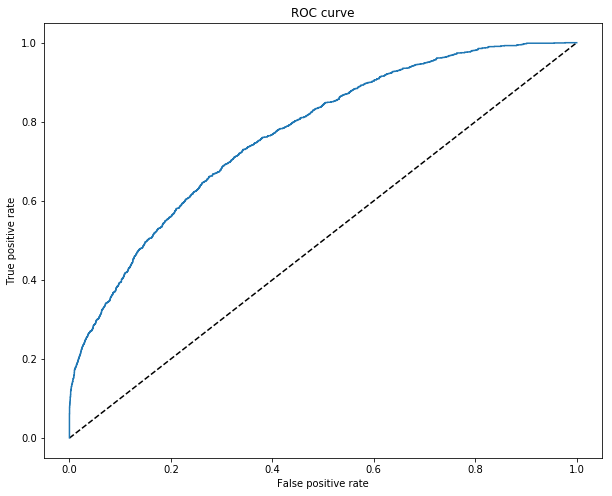

In [59]:
plot_roc_curve(y_test,y_prob[:,1])

## Confusion Matrix

In [60]:
y_pred = pipe_gbc4.predict(X_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.87      0.72      0.79      4506
          1       0.44      0.66      0.53      1500

avg / total       0.76      0.71      0.72      6006



# Feature Importance

### List from Feature that has big affect to model prediction. Feature that affect whether the drivers was dangerous or not

In [115]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from numpy import loadtxt
from numpy import sort
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, stratify=y)
rus = RandomUnderSampler()
X_sampled,y_sampled = rus.fit_sample(X_train,y_train)
gbc = GradientBoostingClassifier()
model=gbc.fit(X_sampled,y_sampled)

Wall time: 3.66 s


In [116]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]


In [117]:
to_bar = pd.DataFrame([df_main.columns[indices],importances[indices]]).transpose()
to_bar.columns = ['Feature','Value']

In [118]:
#df_main.info()

Feature ranking:
1. feature Accuracy (0.121604)
2. feature acc_gyro_x (0.115406)
3. feature speed_xz (0.069918)
4. feature Bearing (0.055435)
5. feature speed_x (0.043158)
6. feature Speed (0.040036)
7. feature count (0.036969)
8. feature acc_xyz (0.034760)
9. feature gyro_x (0.027620)
10. feature acc_xz (0.027394)
11. feature speed_y (0.025662)
12. feature rad_yz (0.023558)
13. feature rad_z (0.021659)
14. feature acceleration_z (0.020931)
15. feature gyro_y (0.020823)
16. feature rad_y (0.020403)
17. feature distance (0.020095)
18. feature acceleration_x (0.019364)
19. feature acc_yz (0.019002)
20. feature acc_gyro_xy (0.017771)


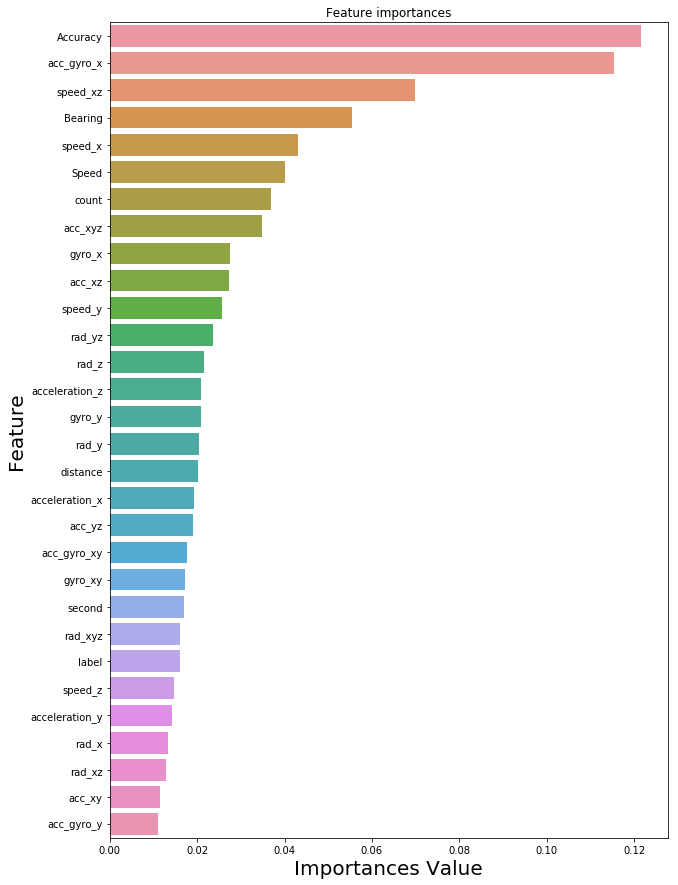

In [119]:
# Print the feature ranking
print("Feature ranking:")

for f in range(20):
    print("%d. feature %s (%f)" % (f + 1, df_main.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(10, 15))
plt.title("Feature importances")
ax = sns.barplot(x='Value',y='Feature',data=to_bar[0:30])
plt.xlabel('Importances Value', fontsize = 20)
plt.ylabel('Feature', fontsize = 20)
plt.show()
